> # Non-Linear SVM #

#### There are many data that cannot be classified linearly. One method to handle non-linear data is adding features like polynomial features. ####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings ; warnings.filterwarnings("ignore")

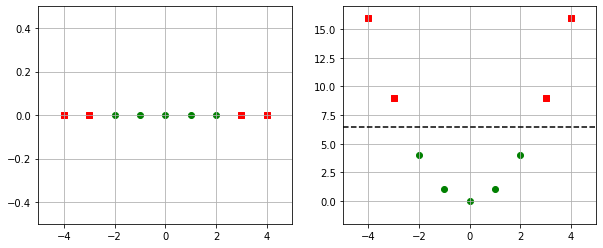

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,4))

ax1.axis([-5,5,-0.5,0.5])
ax1.scatter([-4, -3, 3, 4], [0, 0, 0, 0], c='r' ,marker='s')
ax1.scatter([-2, -1, 0, 1, 2], (0, 0, 0, 0, 0), c='g')
ax1.grid(True)

ax2.axis([-5,5,-2,17])
ax2.scatter([-4, -3, 3, 4], [16, 9, 9, 16], c='r' ,marker='s')
ax2.scatter([-2, -1, 0, 1, 2], (4, 1, 0, 1, 4), c='g')
ax2.plot([-5, 5], [6.5, 6.5], c='black', linestyle = '--')
ax2.grid(True)

#### Let's implement this algorithm with sklearn ####

In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

X, Y = make_moons(n_samples = 100, noise = 0.15)
poly_svm = Pipeline([
    ("poly" , PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(C=10, loss='hinge'))
])

In [4]:
poly_svm.fit(X,Y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm', LinearSVC(C=10, loss='hinge'))])

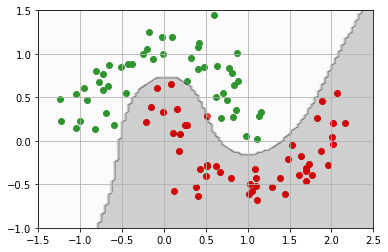

In [5]:
plt.axis([-1.5,2.5, -1, 1.5]) ; plt.grid(True)
plt.scatter(X[Y==1][:,0],X[Y==1][:,1], c='red')
plt.scatter(X[Y==0][:,0],X[Y==0][:,1], c='g')

x0s = np.linspace(-1.5, 2.5, 100)
x1s = np.linspace(-1, 1.5, 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_im = np.c_[x0.flatten(),x1.flatten()]
y_pred = poly_svm.predict(X_im)
y_decision = poly_svm.decision_function(X_im)

plt.contourf(x0, x1, y_pred.reshape(x0.shape), cmap=plt.cm.binary, alpha=0.2)

## Kernel Trick ##
#### Adding polynomial features is simple and effective in all machine learning algorithm. But low degree can't represent complex dataset, and high degree makes model slow.  ####
#### Kernel trick is a mathmatical technique that derives a model like adding polynomial features. Actually it doesn't add polynomial features. ####

In [7]:
from sklearn.svm import SVC

kernel_trick1 = Pipeline([
    ("scaler", StandardScaler()),
    ('svm', SVC(kernel="poly", degree=3, coef0=1, C=5))
])

kernel_trick2 = Pipeline([
    ("scaler", StandardScaler()),
    ('svm', SVC(kernel="poly", degree=10, coef0=100, C=5))
])

In [8]:
kernel_trick1.fit(X,Y)
kernel_trick2.fit(X,Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

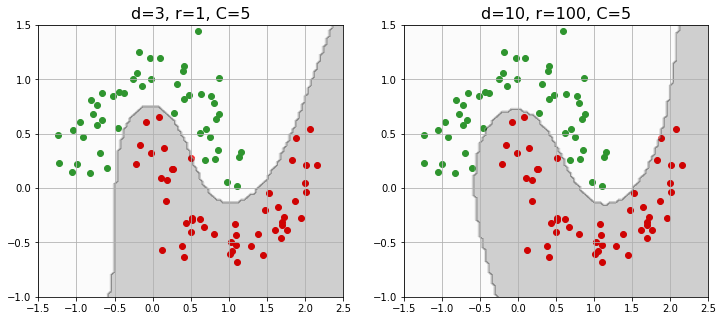

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,5))

ax1.axis([-1.5,2.5, -1, 1.5]) ; ax1.grid(True); ax1.set_title("d=3, r=1, C=5", fontsize=16)
ax1.scatter(X[Y==1][:,0],X[Y==1][:,1], c='red')
ax1.scatter(X[Y==0][:,0],X[Y==0][:,1], c='g')

y_pred = kernel_trick1.predict(X_im)
y_decision = kernel_trick1.decision_function(X_im)
ax1.contourf(x0, x1, y_pred.reshape(x0.shape), cmap=plt.cm.binary, alpha=0.2)



ax2.axis([-1.5,2.5, -1, 1.5]) ; ax2.grid(True); ax2.set_title("d=10, r=100, C=5", fontsize=16)
ax2.scatter(X[Y==1][:,0],X[Y==1][:,1], c='red')
ax2.scatter(X[Y==0][:,0],X[Y==0][:,1], c='g')

y_pred = kernel_trick2.predict(X_im)
y_decision = kernel_trick2.decision_function(X_im)
ax2.contourf(x0, x1, y_pred.reshape(x0.shape), cmap=plt.cm.binary, alpha=0.2)

## Similarity Feature ##

#### Another method handling nonlinear features is adding similarity features. similarity features are calculated by similarity function that checks how each samples is similar to some landmarks. ####

#### EX) Let's set landmark at -2 and 1. And set gaussian radial basis function whose gamma is 0.3 as similarity function. ####
### $ \phi_\gamma(\mathbf{x},l) = exp(-\gamma|\mathbf{x}-l|^2) $ ###

Text(0.7, 0.85, 'X3')

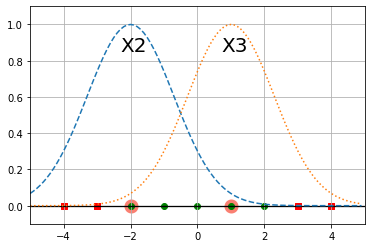

In [68]:
plt.axis([-5,5,-0.1,1.1])
plt.scatter([-2,1], [0,0], c='salmon', linewidths=8)
plt.scatter([-4, -3, 3, 4], [0, 0, 0, 0], c='r' ,marker='s')
plt.scatter([-2, -1, 0, 1, 2], (0, 0, 0, 0, 0), c='g')
plt.plot([-5,5],[0,0], c='black', linewidth=1.3)
plt.grid(True)

a = np.arange(-5,5,0.1)
a1 = np.exp(-0.3*abs(a+2)**2)
a2 = np.exp(-0.3*abs(a-1)**2)
plt.plot(a,a1, linestyle='--')
plt.plot(a,a2, linestyle='dotted')

plt.text(-2.3,0.85,'X2', fontsize=20)
plt.text(0.7,0.85,'X3', fontsize=20)

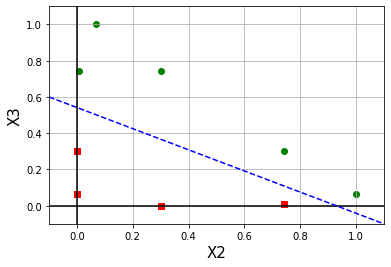

In [91]:
b = np.array([-4, -3, 3, 4])
bx2 = np.exp(-0.3*abs(b+2)**2)
bx3 = np.exp(-0.3*abs(b-1)**2)

c = np.array([-2, -1, 0, 1, 2])
cx2 = np.exp(-0.3*abs(c+2)**2)
cx3 = np.exp(-0.3*abs(c-1)**2)

plt.axis([-0.1,1.1,-0.1,1.1]) ; plt.grid(True) ; plt.xlabel('X2', fontsize=15) ; plt.ylabel('X3', fontsize=15)
plt.plot([-0.1,1.1], [0,0], c="black")
plt.plot([0,0], [-0.1,1.1], c="black")
plt.scatter(bx2, bx3, c='r', marker='s')
plt.scatter(cx2, cx3, c='g')
plt.plot([-0.1,1.1], [0.6,-0.1], c='b', linestyle='--')

In [92]:
rbf1 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', gamma=0.1, C=0.001))
])

rbf2 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', gamma=0.1, C=1000))
])

rbf3 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', gamma=5, C=0.001))
])

rbf4 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', gamma=5, C=1000))
])

In [93]:
rbf1.fit(X, Y)
rbf2.fit(X, Y)
rbf3.fit(X, Y)
rbf4.fit(X, Y)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=1000, gamma=5))])

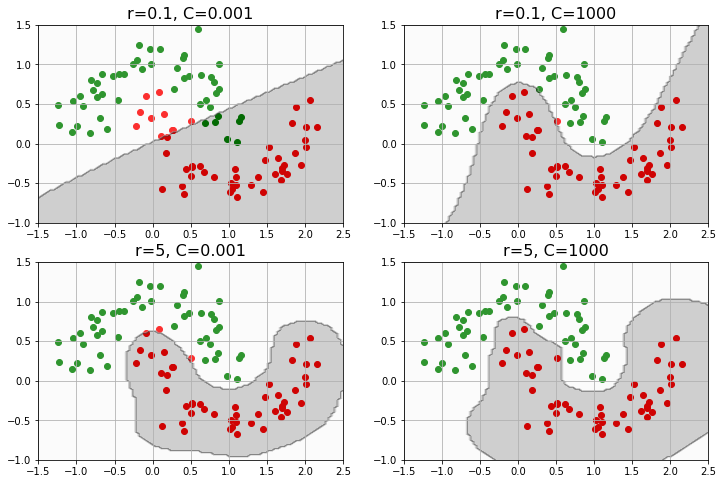

In [96]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,figsize = (12,8))

ax1.axis([-1.5,2.5, -1, 1.5]) ; ax1.grid(True); ax1.set_title("r=0.1, C=0.001", fontsize=16)
ax1.scatter(X[Y==1][:,0],X[Y==1][:,1], c='red')
ax1.scatter(X[Y==0][:,0],X[Y==0][:,1], c='g')

y_pred = rbf1.predict(X_im)
ax1.contourf(x0, x1, y_pred.reshape(x0.shape), cmap=plt.cm.binary, alpha=0.2)



ax2.axis([-1.5,2.5, -1, 1.5]) ; ax2.grid(True); ax2.set_title("r=0.1, C=1000", fontsize=16)
ax2.scatter(X[Y==1][:,0],X[Y==1][:,1], c='red')
ax2.scatter(X[Y==0][:,0],X[Y==0][:,1], c='g')

y_pred = rbf2.predict(X_im)
ax2.contourf(x0, x1, y_pred.reshape(x0.shape), cmap=plt.cm.binary, alpha=0.2)


ax3.axis([-1.5,2.5, -1, 1.5]) ; ax3.grid(True); ax3.set_title("r=5, C=0.001", fontsize=16)
ax3.scatter(X[Y==1][:,0],X[Y==1][:,1], c='red')
ax3.scatter(X[Y==0][:,0],X[Y==0][:,1], c='g')

y_pred = rbf3.predict(X_im)
ax3.contourf(x0, x1, y_pred.reshape(x0.shape), cmap=plt.cm.binary, alpha=0.2)


ax4.axis([-1.5,2.5, -1, 1.5]) ; ax4.grid(True); ax4.set_title("r=5, C=1000", fontsize=16)
ax4.scatter(X[Y==1][:,0],X[Y==1][:,1], c='red')
ax4.scatter(X[Y==0][:,0],X[Y==0][:,1], c='g')

y_pred = rbf4.predict(X_im)
ax4.contourf(x0, x1, y_pred.reshape(x0.shape), cmap=plt.cm.binary, alpha=0.2)

#### Gamma is hyperparameter of rbf kernel. Increasing gamma makes decision boundary more irregular and winding. And low gamma makes decision boundary more smooth.  ####